In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/H516/sales.csv'

Reading the data from the Google drive

In [ ]:
df = pd.read_csv(path, encoding='latin')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Preprocessing of the data

In [ ]:
#converting invoice date into datatime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.set_index('InvoiceDate')

In [ ]:
# checking the null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#drop CustomerID column as it has many null values
df = df.drop(columns=['CustomerID'])

In [ ]:
from scipy import stats

# Calculate the Z-score for the Sales column
z_scores = stats.zscore(df['Sales'])

# Define a threshold for identifying outliers (e.g., Z-score > 3 or Z-score < -3)
outlier_threshold = 3

# Identify indices of outliers
outlier_indices = abs(z_scores) > outlier_threshold

# Filter the DataFrame to exclude outliers
#data1 = data[~outlier_indices]

# Print the number of outliers
print(f'Number of outliers: {sum(outlier_indices)}')


Number of outliers: 403


In [ ]:
df[df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 11:52:00,536414,22139,NaN,56,0.0,United Kingdom
2010-12-01 14:32:00,536545,21134,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536546,22145,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536547,37509,NaN,1,0.0,United Kingdom
2010-12-01 14:34:00,536549,85226A,NaN,1,0.0,United Kingdom


In [ ]:
#imputing with UNKNOWN ITEM for null values data
df['Description'] = df['Description'].fillna('UNKNOWN ITEM')
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [ ]:
df['Description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

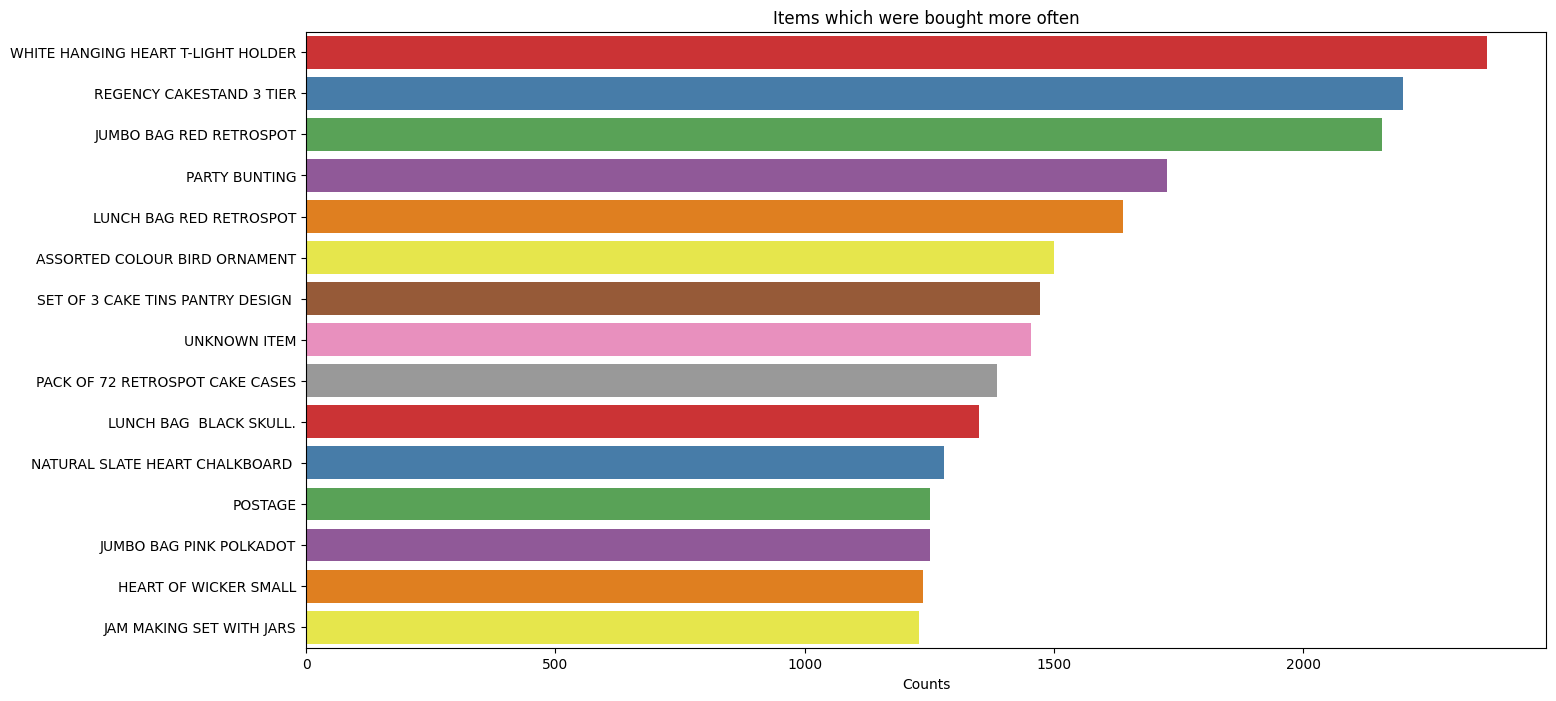

In [ ]:
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]

plt.figure(figsize=(16, 8))
sns.barplot(y=item_counts.index, x=item_counts.values, palette='Set1')
plt.xlabel("Counts")
plt.title("Items which were bought more often")
plt.show()


In [ ]:
df['Description'].value_counts().tail()

Missing                                1
historic computer difference?....se    1
DUSTY PINK CHRISTMAS TREE 30CM         1
WRAP BLUE RUSSIAN FOLKART              1
PINK BERTIE MOBILE PHONE CHARM         1
Name: Description, dtype: int64

 it is evident that valid items are typically represented in uppercase, while non-valid items or cancellations are indicated in lowercase.

In [ ]:
df[~df['Description'].str.isupper()]['Description'].value_counts().head()

Manual                                572
BAG 125g SWIRLY MARBLES               304
BAG 250g SWIRLY MARBLES               252
3 TRADITIONAl BISCUIT CUTTERS  SET    240
POLYESTER FILLER PAD 40x40cm          193
Name: Description, dtype: int64

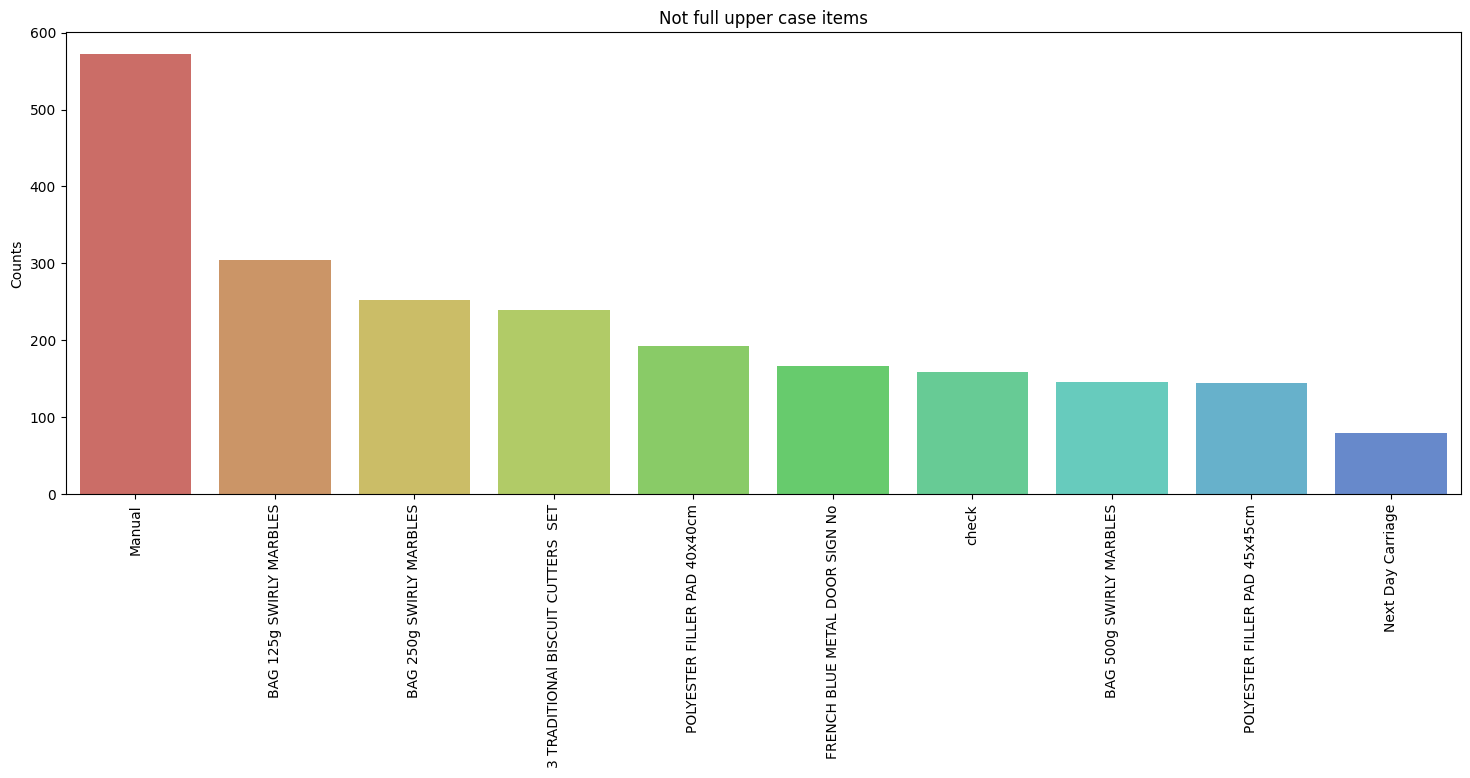

In [ ]:
lcase_counts = df[~df['Description'].str.isupper()]['Description'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(18,6))
sns.barplot(x=lcase_counts.index, y=lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

In [ ]:
df['StockCode'].value_counts().head()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: StockCode, dtype: int64

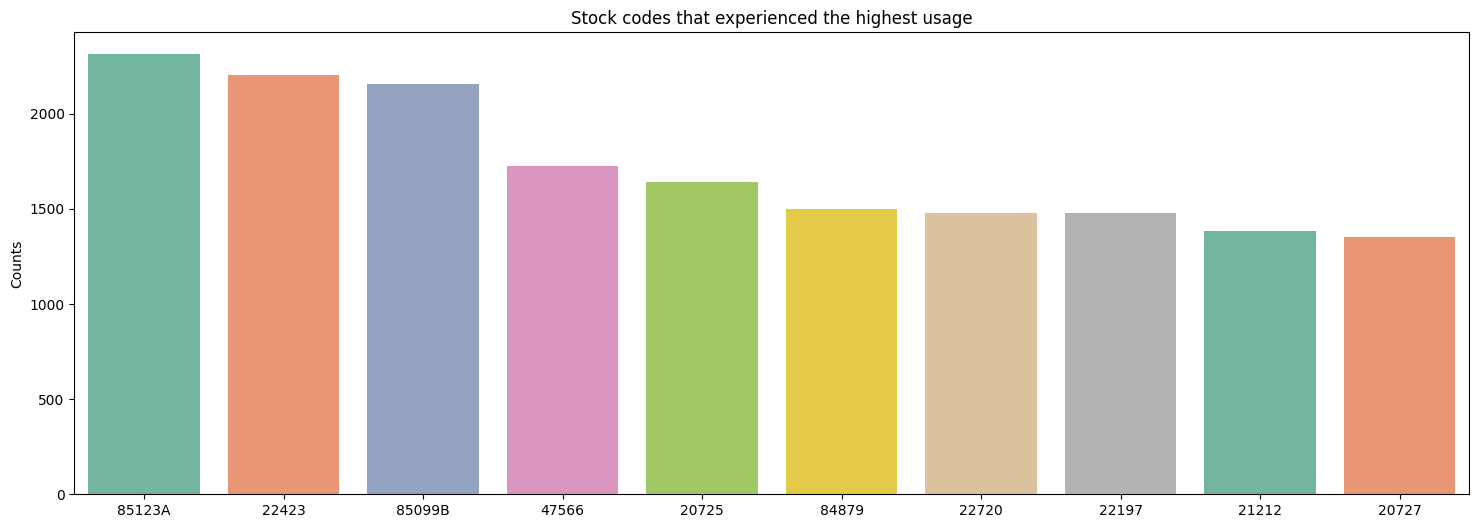

In [ ]:
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(18,6))
sns.barplot(x=stock_counts.index, y=stock_counts.values, palette='Set2')
plt.ylabel("Counts")
plt.title("Stock codes that experienced the highest usage");


In [ ]:
df['InvoiceNo'].value_counts().tail()

554023     1
554022     1
554021     1
554020     1
C558901    1
Name: InvoiceNo, dtype: int64

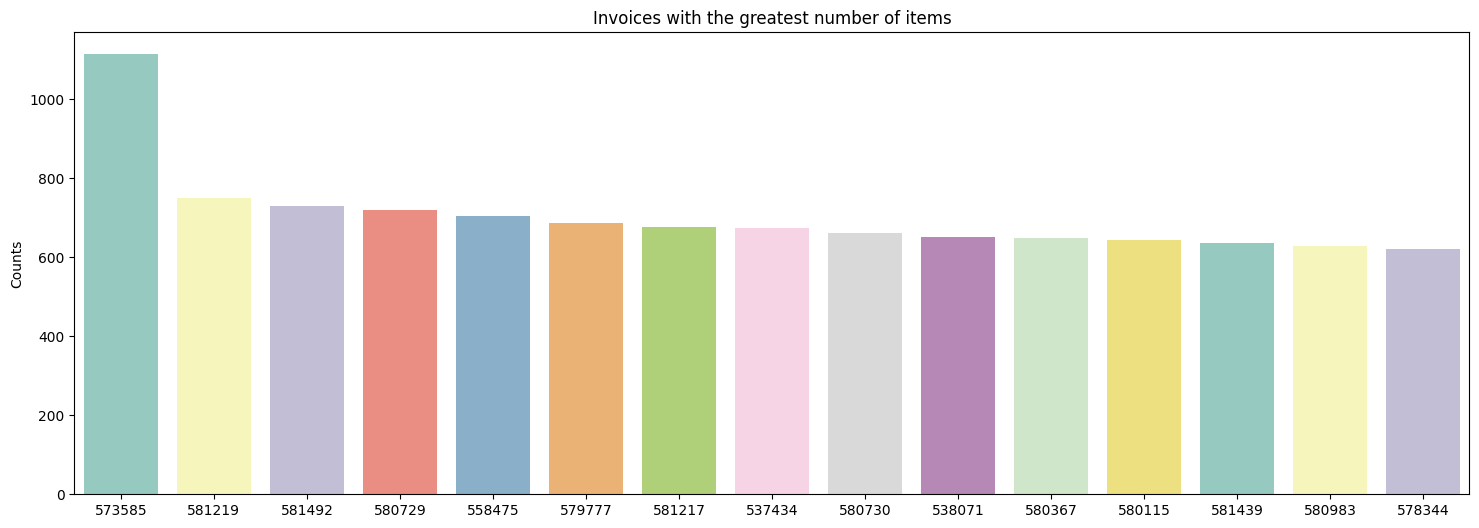

In [ ]:
inv_counts = df['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=inv_counts.index, y=inv_counts.values, palette='Set3')
plt.ylabel("Counts")
plt.title("Invoices with the highest number of items");

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34


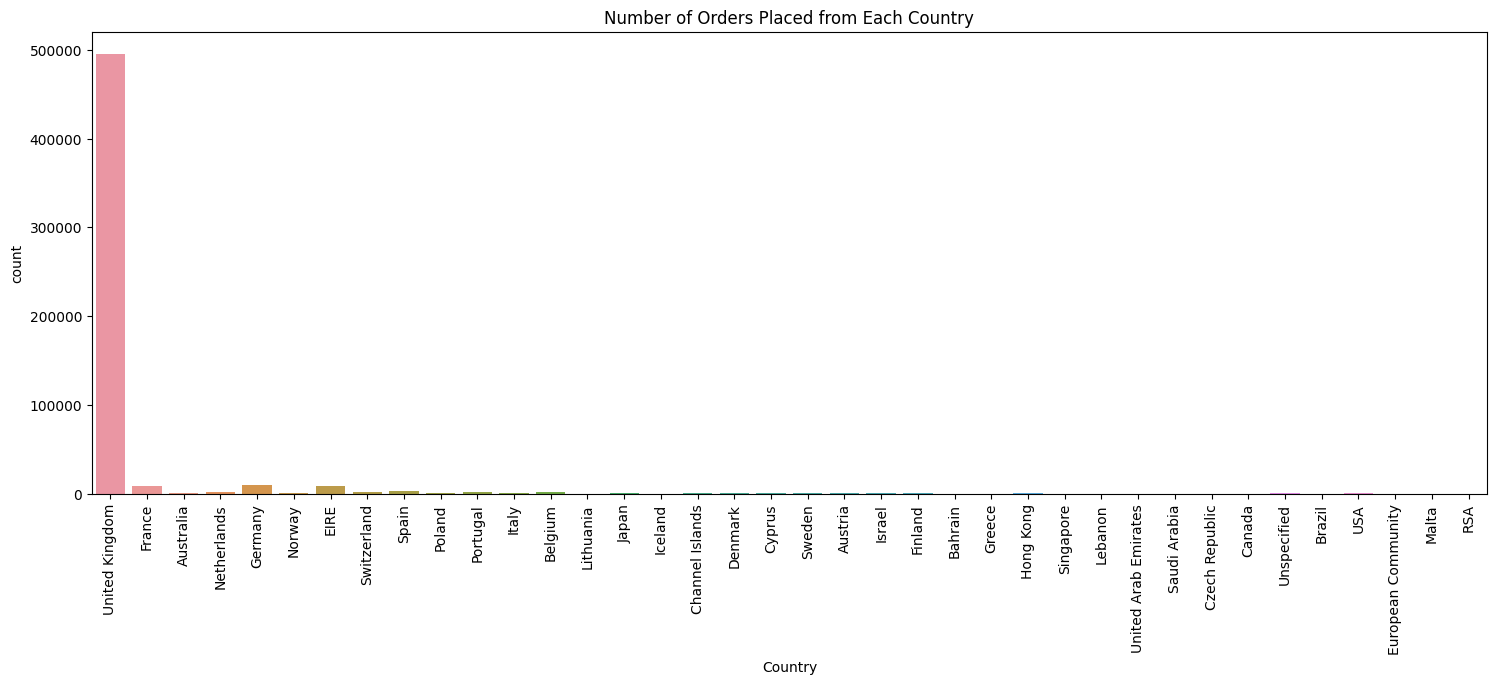

In [ ]:

plt.figure(figsize=(18, 6))
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)
plt.title('Number of Orders Placed from Each Country')
plt.show()


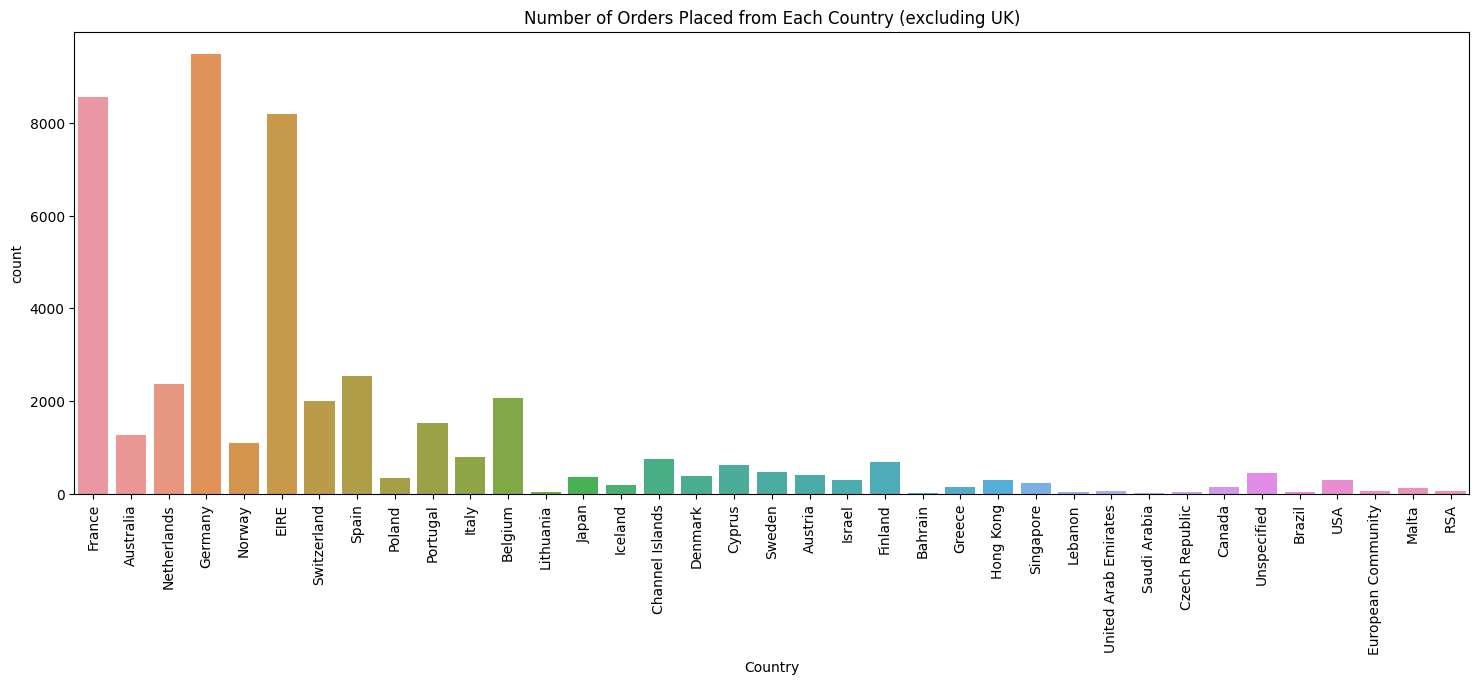

In [ ]:

plt.figure(figsize=(18, 6))
sns.countplot(x='Country', data=df[df['Country'] != 'United Kingdom'])
plt.xticks(rotation=90)
plt.title('Number of Orders Placed from Each Country (excluding UK)')
plt.show()


<Figure size 1000x500 with 0 Axes>

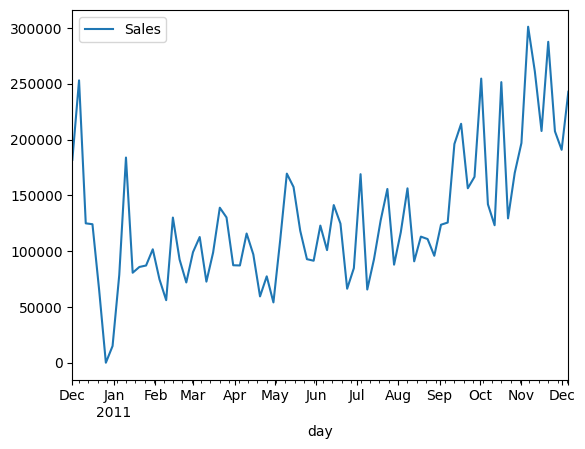

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
day_sales = data.set_index('InvoiceDate').resample('5D')['Sales'].sum()
day_sales_df = day_sales.to_frame(name='Sales')
day_sales_df.index.name ='month'
plt.figure(figsize=(10,5))
day_sales_df.plot()
plt.show()

In [ ]:
data = pd.read_csv(path, encoding='latin')

In [ ]:
data['Sales'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


**Linear Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Data Preprocessing
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour

# Drop unnecessary columns
X = data[['Quantity', 'UnitPrice', 'Month', 'Day', 'Hour']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a Model (Linear Regression)
model = LinearRegression()

# Train the Model
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)

# Create a new column 'Predicted_Sales' in the data1 DataFrame
data['Predicted_Sales'] = model.predict(scaler.transform(X))
# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'LinearRegression - Mean Absolute Error: {mae}')
print(f'LinearRegression - R-squared: {r2}')


LinearRegression - Mean Absolute Error: 17.447626659835976
LinearRegression - R-squared: 0.8463482230010873


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Choose a Model (Random Forest Regressor)
rf_model = RandomForestRegressor(random_state=42)

# Train the Model
rf_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Create a new column 'Predicted_Sales' in the data1 DataFrame
data['Predicted_Sales'] = rf_model.predict(scaler.transform(X))

# Evaluate the Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - R-squared: {r2_rf}')

Random Forest - Mean Absolute Error: 2.120661012437567
Random Forest - R-squared: 0.5293030633852795


Tried Cross Validator (cv=5) in Random Forest Regressor,

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create a base model
base_model = RandomForestRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    base_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random samples to try
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Choose an appropriate scoring metric
    random_state=42
)

# Perform the RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Model - Mean Absolute Error: {mae}')
print(f'Random Forest - R-squared: {r2}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 131}
Random Forest Model - Mean Absolute Error: 7.807487833560331
Random Forest - R-squared: 0.0768327697019926


**Gradient Boosting Regressor Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(random_state=42)

# Train the Model
gb_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the Model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - Mean Absolute Error: {mae_gb}')
print(f'Gradient Boosting - R-squared: {r2_gb}')

Gradient Boosting - Mean Absolute Error: 6.900889741314261
Gradient Boosting - R-squared: 0.5548248708156567


Confusion Matrix for Linear Regression Model:

Here we have converted the Regression Predictions into binary classification to show the Confusion Matrix. We have assumed that the sales value higher than 500 becomes 1 and remaining as 0 for both test and predicted values.

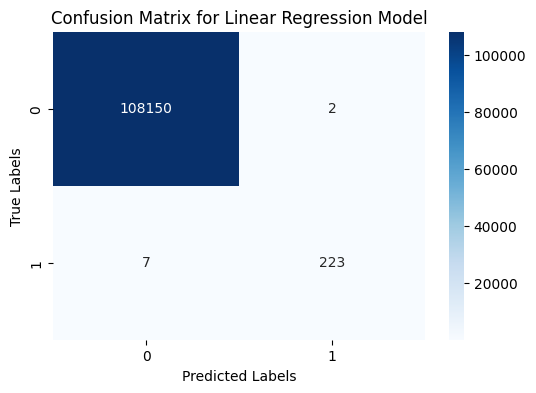

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
threshold = 500  # Set your threshold

# Convert regression predictions into binary classification
y_classified = np.where(y_pred > threshold, 1, 0)
y_actual_classified = np.where(y_test > threshold, 1, 0)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_actual_classified, y_classified, labels=[0, 1])

# Display the confusion matrix with labels
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Linear Regression Model')
plt.show()


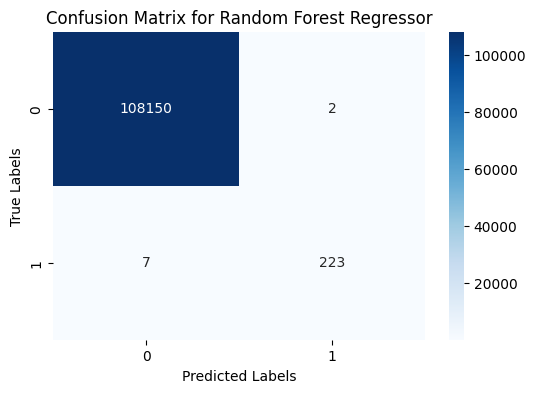

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
threshold = 500  # Set your threshold

# Convert regression predictions into binary classification
y_classified = np.where(y_pred_rf > threshold, 1, 0)
y_actual_classified = np.where(y_test > threshold, 1, 0)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_actual_classified, y_classified, labels=[0, 1])

# Display the confusion matrix with labels
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Regressor')
plt.show()


Plot showing Actual vs Predicted Sales

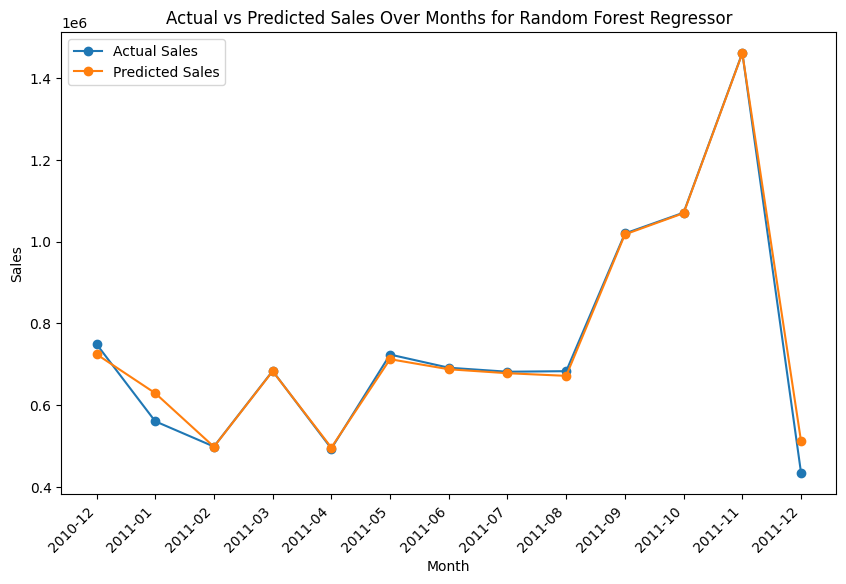

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'InvoiceDate' to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract month from 'InvoiceDate'
data['Month'] = data['InvoiceDate'].dt.to_period('M').astype(str)

# Group by month and calculate the sum of sales and predicted sales
monthly_data = data.groupby('Month')[['Sales', 'Predicted_Sales']].sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Sales'], label='Actual Sales', marker='o')
plt.plot(monthly_data.index, monthly_data['Predicted_Sales'], label='Predicted Sales', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales Over Months for Random Forest Regressor')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


**Forecasting Models**

1. Forecasting for Month

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


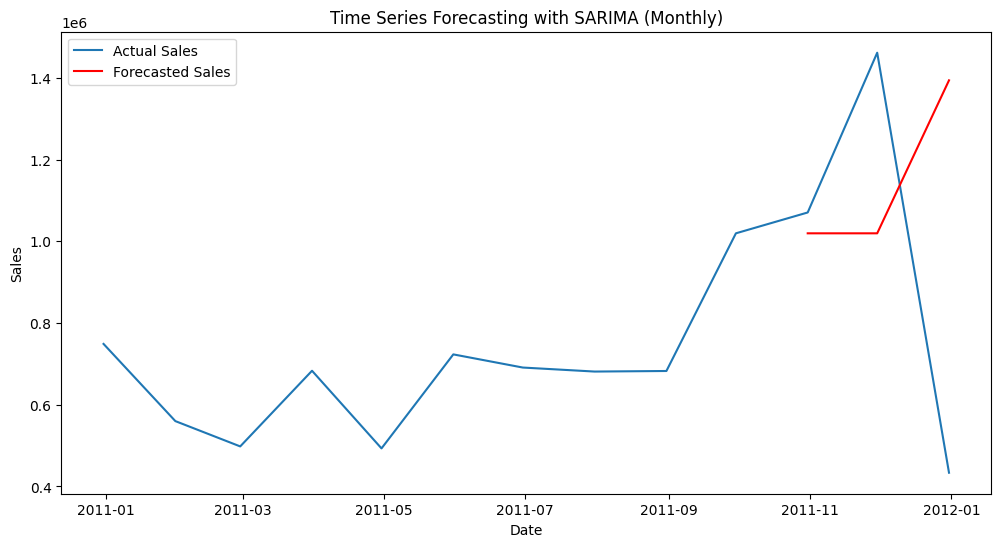

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convert 'InvoiceDate' to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set 'InvoiceDate' as the index
data.set_index('InvoiceDate', inplace=True)

# Monthly resampling (adjust as needed)
monthly_sales = data['Sales'].resample('M').sum()

# Train-test split
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# SARIMA model
order = (1, 1, 1, 12)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model = model.fit(disp=False)

# Forecasting
forecast = fit_model.get_forecast(steps=len(test))
forecast_index = pd.date_range(start=train.index[-1], periods=len(test) + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Forecasting with SARIMA (Monthly)')
plt.legend()
plt.show()


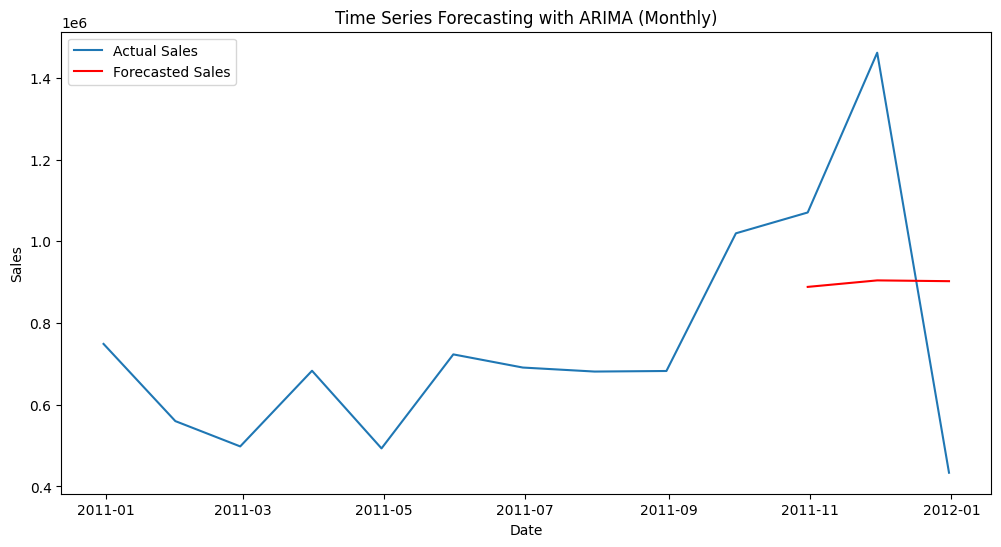

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convert 'InvoiceDate' to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set 'InvoiceDate' as the index
data.set_index('InvoiceDate', inplace=True)

# Monthly resampling (adjust as needed)
monthly_sales = data['Sales'].resample('M').sum()

# Train-test split
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# ARIMA model
order = (1, 1, 1)  # Adjust the order based on your data and analysis
model = ARIMA(train, order=order)
fit_model = model.fit()

# Forecasting
forecast = fit_model.get_forecast(steps=len(test))
forecast_index = pd.date_range(start=train.index[-1], periods=len(test) + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Forecasting with ARIMA (Monthly)')
plt.legend()
plt.show()


2. Forecasting for Week

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


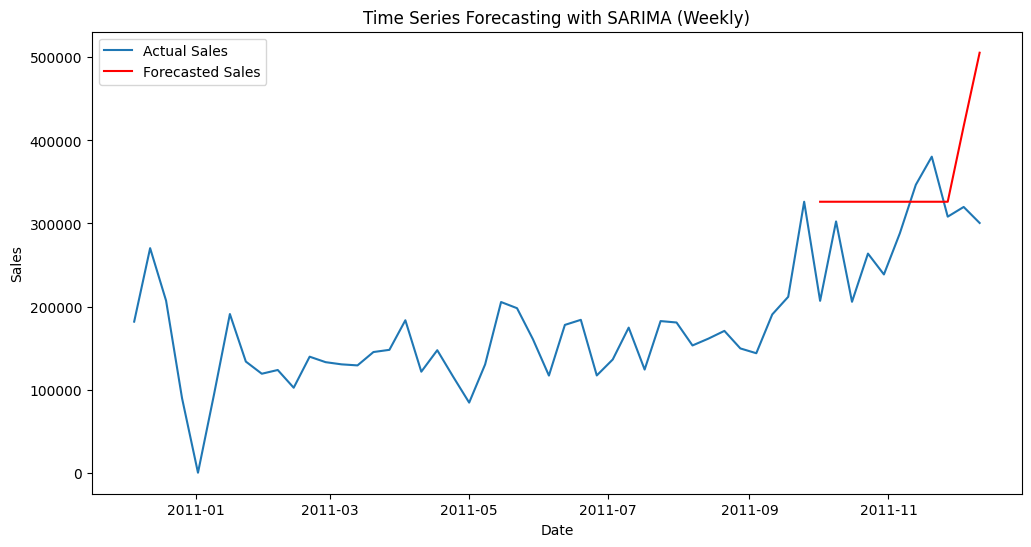

In [ ]:
#Weekly Sales
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convert 'InvoiceDate' to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set 'InvoiceDate' as the index
data.set_index('InvoiceDate', inplace=True)

# Daily resampling
daily_sales = data['Sales'].resample('W').sum()

# Train-test split
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

# SARIMA model
order = (2, 1, 1, 52)
model = SARIMAX(train, order=(2, 1, 1), seasonal_order=(0, 1, 1, 52))
fit_model = model.fit(disp=False)

# Forecasting
forecast_steps = len(test)
forecast = fit_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps + 1, freq='W')[1:]
forecast_values = forecast.predicted_mean

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Forecasting with SARIMA (Weekly)')
plt.legend()
plt.show()


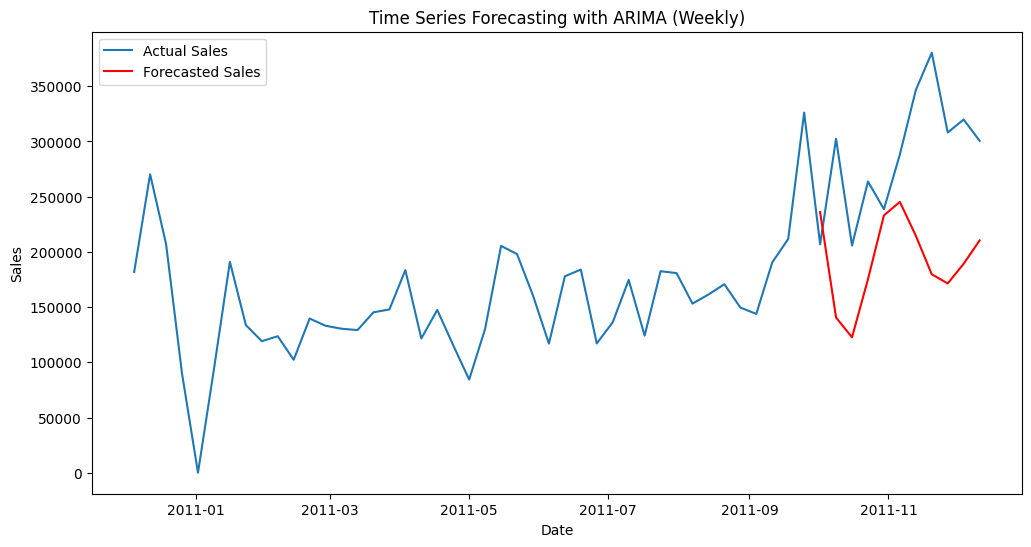

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convert 'InvoiceDate' to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set 'InvoiceDate' as the index
data.set_index('InvoiceDate', inplace=True)

# Monthly resampling (adjust as needed)
daily_sales = data['Sales'].resample('W').sum()

# Train-test split
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

# ARIMA model
order = (2, 1, 2)
model = ARIMA(train, order=order)
fit_model = model.fit()

# Forecasting
forecast = fit_model.get_forecast(steps=len(test))
forecast_index = pd.date_range(start=train.index[-1], periods=len(test) + 1, freq='W')[1:]
forecast_values = forecast.predicted_mean

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Forecasting with ARIMA (Weekly)')
plt.legend()
plt.show()

3. Forecasting for Daily

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


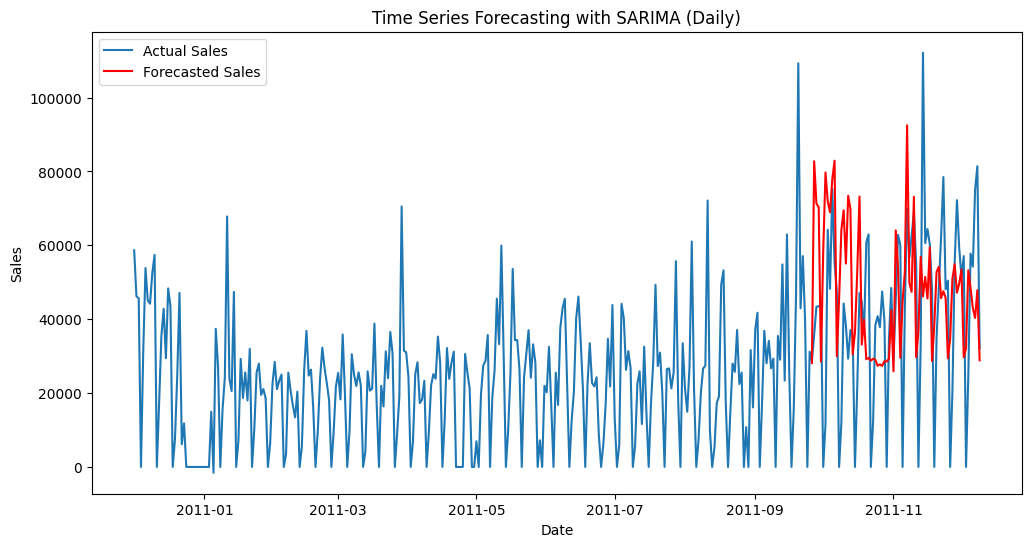

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convert 'InvoiceDate' to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set 'InvoiceDate' as the index
data.set_index('InvoiceDate', inplace=True)

# Daily resampling
daily_sales = data['Sales'].resample('D').sum()

# Train-test split
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

# SARIMA model
order = (1, 1, 1, 150)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 150))
fit_model = model.fit(disp=False)

# Forecasting
forecast_steps = len(test)
forecast = fit_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Forecasting with SARIMA (Daily)')
plt.legend()
plt.show()


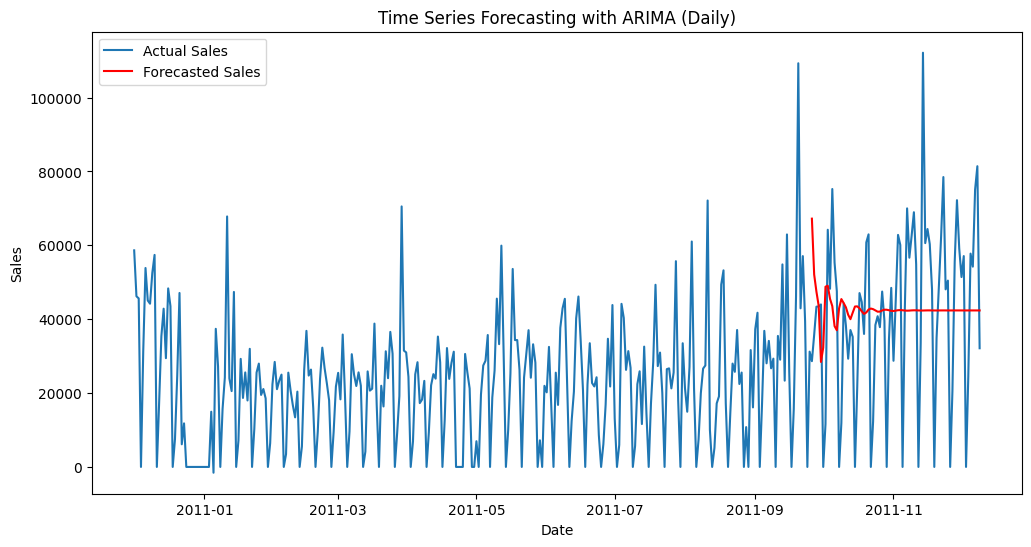

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convert 'InvoiceDate' to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set 'InvoiceDate' as the index
data.set_index('InvoiceDate', inplace=True)

# Monthly resampling (adjust as needed)
daily_sales = data['Sales'].resample('D').sum()

# Train-test split
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

# ARIMA model
order = (5, 1, 0)
model = ARIMA(train, order=order)
fit_model = model.fit()

# Forecasting
forecast = fit_model.get_forecast(steps=len(test))
forecast_index = pd.date_range(start=train.index[-1], periods=len(test) + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Forecasting with ARIMA (Daily)')
plt.legend()
plt.show()